# Multiple Linear Regression with Dummies - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year_view.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. 

In this exercise, the dependent variable is 'price', while the independent variables are 'size', 'year', and 'view'.

#### Regarding the 'view' variable:
There are two options: 'Sea view' and 'No sea view'. You are expected to create a dummy variable for view and include it in the regression

Good luck!

## Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import statsmodels.api as sm


## Load the data

In [3]:
df_data=pd.read_csv('real_estate_price_size_year_view.csv')

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   100 non-null    float64
 1   size    100 non-null    float64
 2   year    100 non-null    int64  
 3   view    100 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


In [6]:
df_data.head(3)

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view


## Create a dummy variable for 'view'

In [12]:
df_data["d_variable"]=[ 0 if i == "No sea view" else 1 for i in df_data.view]

In [13]:
df_data['d_view']=df_data.view.map({'No sea view':0, 'Sea view':1})

In [14]:
df_data

,price,size,year,view,d_variable,d_view
0,234314.144,643.09,2015,No sea view,0,0
1,228581.528,656.22,2009,No sea view,0,0
2,281626.336,487.29,2018,Sea view,1,1
3,401255.608,1504.75,2015,No sea view,0,0
4,458674.256,1275.46,2009,Sea view,1,1
...,...,...,...,...,...,...
95,252460.400,549.80,2009,Sea view,1,1
96,310522.592,1037.44,2009,No sea view,0,0
97,383635.568,1504.75,2006,No sea view,0,0
98,225145.248,648.29,2015,No sea view,0,0


## Create the regression

### Declare the dependent and the independent variables

In [15]:
y_target = df_data.price

In [18]:
features = df_data.drop(['price','view','d_variable'], axis=1)

In [20]:
X =sm.add_constant(features)

,const,size,year,d_view
0,1.0,643.09,2015,0
1,1.0,656.22,2009,0
2,1.0,487.29,2018,1
3,1.0,1504.75,2015,0
4,1.0,1275.46,2009,1
...,...,...,...,...
95,1.0,549.80,2009,1
96,1.0,1037.44,2009,0
97,1.0,1504.75,2006,0
98,1.0,648.29,2015,0


### Regression

In [22]:
reg_model = sm.OLS(y_target, X)

In [23]:
fit_reg_model = reg_model.fit()

In [24]:
fit_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     335.2
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           1.02e-50
Time:                        09:08:27   Log-Likelihood:                -1144.6
No. Observations:                 100   AIC:                             2297.
Df Residuals:                      96   BIC:                             2308.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.398e+06   9.94e+05     -5.431      0.000   -7.37e+06   -3.43e+06
size         223.0316      7.838     28.455      0.000     207.473     238.590
year        2718.9489    493.502      5.510      0.000    1739.356    3698.542
d_view      5.673e+04   4627.695     12.258      0.000    4.75e+04    6.59e+04
==============================================================================
Omnibus:                       29.224   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.957
Skew:                           1.088   Prob(JB):                     7.85e-15
Kurtosis:                       6.295   Cond. No.                     9.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

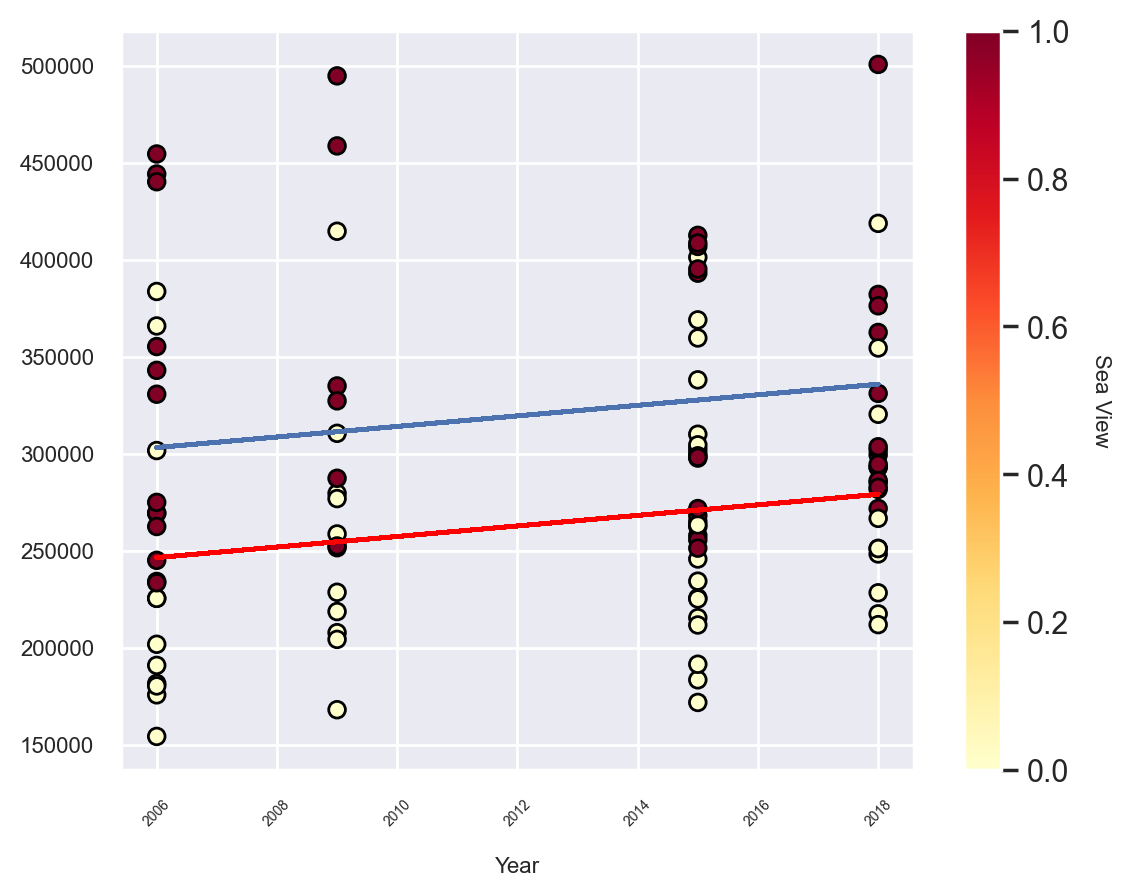

In [64]:
plt.figure(dpi=200)
scatter_1 = plt.scatter(df_data.year, df_data.price, c=df_data.d_view, cmap='YlOrRd', edgecolor='black')
cbar = plt.colorbar(scatter_1)
cbar.set_label("Sea View", rotation=270, labelpad=15, fontsize=8)
plt.xticks(fontsize=5, rotation = 45)
plt.yticks(fontsize=8)
plt.xlabel("Year", fontsize=8, labelpad=10)

predicted_with_1 = -5.398e+06 + 223.0316*df_data['size'].mean() + 2718.9489*df_data.year + 5.673e+04*1 		
fit_line = plt.plot(df_data.year,predicted_with_1)

predicted_with_0 = -5.398e+06 + 223.0316*df_data['size'].mean() + 2718.9489*df_data.year + 5.673e+04*0 		
fit_line = plt.plot(df_data.year,predicted_with_0, color = 'red')